In [1]:
import tensorflow as tf
import tensorflow_probability as tfp

In [2]:
# Build a dataflow graph.
c = tf.constant([[1.0, 2.0], [3.0, 4.0]])
d = tf.constant([[1.0, 1.0], [0.0, 1.0]])
e = tf.matmul(c, d)

In [8]:
e.numpy()

array([[1., 3.],
       [3., 7.]], dtype=float32)

In [10]:
x = tf.ones((2, 2))

with tf.GradientTape() as t:
    t.watch(x)
    y = tf.reduce_sum(x)
    z = tf.multiply(y, y)

# Derivative of z with respect to the original input tensor x
dz_dx = t.gradient(z, x)
for i in [0, 1]:
    for j in [0, 1]:
        assert dz_dx[i][j].numpy() == 8.0

In [13]:
import numpy as np

In [14]:
R = np.array([
    [-1., 1],
    [0, 0],
    [1, 1],
])

In [ ]:
springs = []

In [10]:
R = tf.ones((2, 2))

with tf.GradientTape() as t:
    t.watch(x)
    y = tf.reduce_sum(x)
    z = tf.multiply(y, y)

# Derivative of z with respect to the original input tensor x
dz_dx = t.gradient(z, x)
for i in [0, 1]:
    for j in [0, 1]:
        assert dz_dx[i][j].numpy() == 8.0

In [35]:
tf.function?

In [34]:
# Target distribution is proportional to: `exp(-x (1 + x))`.
def unnormalized_log_prob(x):
    return -x - x**2.

# Initialize the HMC transition kernel.
num_results = int(5e4)
num_burnin_steps = int(1e3)
adaptive_hmc = tfp.mcmc.SimpleStepSizeAdaptation(
    tfp.mcmc.HamiltonianMonteCarlo(
        target_log_prob_fn=unnormalized_log_prob,
        num_leapfrog_steps=3,
        step_size=1.),
    num_adaptation_steps=int(num_burnin_steps * 0.8))

# Run the chain (with burn-in).
@tf.function
def run_chain():
    # Run the chain (with burn-in).
    samples, is_accepted = tfp.mcmc.sample_chain(
        num_results=num_results,
        num_burnin_steps=num_burnin_steps,
        current_state=1.,
        kernel=adaptive_hmc,
        trace_fn=lambda _, pkr: pkr.inner_results.is_accepted)

    sample_mean = tf.reduce_mean(samples)
    sample_stddev = tf.math.reduce_std(samples)
    is_accepted = tf.reduce_mean(tf.cast(is_accepted, dtype=tf.float32))
    return sample_mean, sample_stddev, is_accepted

sample_mean, sample_stddev, is_accepted = run_chain()

print('mean:{:.4f}  stddev:{:.4f}  acceptance:{:.4f}'.format(
    sample_mean.numpy(), sample_stddev.numpy(), is_accepted.numpy()))

mean:-0.5082  stddev:0.7138  acceptance:0.6390


In [28]:
import numpy as np

In [18]:
x = np.arange(0,1,1e-3)

In [19]:
y = np.exp(unnormalized_log_prob(x))

In [20]:
import matplotlib.pyplot as plt

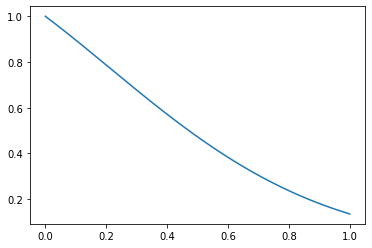

In [21]:
plt.plot(x,y);

In [22]:
np.mean(y)

0.5075035042759979